<a href="https://colab.research.google.com/github/Folasewa/Deep_Learning_with_Tensorflow/blob/main/Another_copy_of_MLP_%26_CNN_Folasewa_B02294068.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><b>Machine Learning and Neural Networks course</b></center></h1>
<h3><center>Exercise 3</center></h3>

*Your* Name:  
<font color='red'>
Folasewa Abdulsalam, B02294068  
</font>


**Instructions:**
- Create a copy of this notebook and implement your code in it.
- Make sure you don't leave empty cells or empty answers. The code has to be clean and clearly commented
- You should not change the code we provided you.
- When you finish the assignment, download this **notebook** and the ***predictions.txt*** files. Grades will be based on both files! Submit both to the Moodle system. To Download the notebook go to "File" -> "Download .ipynb".  
- **Submit deadline: 03/01/2025**


## Part 1 - Neural Network using NumPy

In this part we learn to:
1. Load and preprocess datasets.
2. Implement and train a neural network (multi-layer perceptron) for handwriting recognition (MNIST dataset), using numpy library only.




### **1. Dataset**


Import useful packages

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

Download the MNIST dataset

In [2]:
X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False)
print(X.shape, y.shape)


(70000, 784) (70000,)


Data normalization

In [3]:
## TODO: Normalize the dataset according to Min-Max normalization.
def min_max_norm(X):
    return X / 255.0  # Normalize pixel values to the range [0, 1]

X = min_max_norm(X)



Split the data into Train set and Test set

In [4]:
## TODO: Split the data into Train set and Test set (The use of libraries other than Numpy is strictly prohibited)

split_index = int(0.8 * len(X))  # 80% for training, 20% for testing
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


Activation function

In [5]:
## Here you should Implement the sigmoid activation function and its derivative
def sigmoid(z):
    return 1 / (1 + np.exp(-z))  # Sigmoid activation

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))  # Derivative of sigmoid


Softmax function

In [6]:
## Here you should Implement the softmax function
def softmax(z):
    exp_z = np.exp(z - np.max(z))  # Subtract max for numerical stability
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)  # Normalize


Loss function

In [7]:
## Negative Log Likelihood loss function for the multiclass
def nll_loss(y_pred, y):
    loss = -np.sum(y * np.log(y_pred + 1e-8))  # Add epsilon for numerical stability
    return loss / float(y_pred.shape[1])  # Average over samples


Hyper-Parameters

In [8]:
## Here you should define the main hyper-parameters we discussed about at class.


input_size = 784  # MNIST images are 28x28
hidden_units = 128  # Number of hidden neurons
output_classes = 10  # Number of output classes for MNIST digits
num_of_epochs = 10  # Number of training epochs
learning_rate = 0.01  # Learning rate for gradient descent


Parameters initialization

In [9]:
## Here you should initialize the parameters.
## Note that the MNIST dataset has 10 classes.

W1 = np.random.randn(hidden_units, input_size) * 0.01  # Initialize weights for input to hidden layer
b1 = np.zeros((hidden_units, 1))  # Initialize biases for hidden layer
W2 = np.random.randn(output_classes, hidden_units) * 0.01  # Initialize weights for hidden to output layer
b2 = np.zeros((output_classes, 1))  # Initialize biases for output layer


### **2. Training**


In [10]:
def train(X, y, num_of_epochs, W1, b1, W2, b2, learning_rate):
    train_size = X.shape[1]

    for epoch in range(num_of_epochs):
        avg_epoch_loss = 0
        for i in range(train_size):
            # Forward propagation
            z1 = W1.dot(X[:, i].reshape(-1, 1)) + b1
            h1 = sigmoid(z1)
            z2 = W2.dot(h1) + b2
            y_hat = softmax(z2)

            # Define y_true
            y_true = np.zeros((output_classes, 1))  # Create a one-hot encoded vector
            y_true[int(y[i])] = 1  # Set the true class index to 1

            # Compute loss
            loss = nll_loss(y_hat, y_true)
            avg_epoch_loss += loss

            # Back propagation
            dZ2 = y_hat - y_true  # Gradient for output layer
            dW2 = dZ2.dot(h1.T)
            db2 = np.sum(dZ2, axis=1, keepdims=True)

            dZ1 = W2.T.dot(dZ2) * sigmoid_derivative(z1)
            dW1 = dZ1.dot(X[:, i].reshape(-1, 1).T)
            db1 = np.sum(dZ1, axis=1, keepdims=True)

            # Update weights
            W2 -= learning_rate * dW2
            b2 -= learning_rate * db2
            W1 -= learning_rate * dW1
            b1 -= learning_rate * db1

        avg_epoch_loss /= train_size
        print("Epoch:", epoch + 1, "Loss:", avg_epoch_loss)

    return W1, b1, W2, b2


### **3. Test**

Here you should test your model

In [11]:
def test(X, y):
    true_pred_counter = 0
    test_size = X.shape[1]

    for i in range(test_size):
        # Forward propagation
        z1 = W1.dot(X[:, i].reshape(-1, 1)) + b1
        h1 = sigmoid(z1)
        z2 = W2.dot(h1) + b2
        y_hat = softmax(z2)

        # Predicted class
        predicted_class = np.argmax(y_hat)  # Index of the highest probability
        true_class = int(y[i])

        # Debugging: Print predictions and true labels
        print(f"Sample {i}: Predicted = {predicted_class}, True = {true_class}")

        # Check if the prediction is correct
        if predicted_class == true_class:
            true_pred_counter += 1

    # Compute accuracy
    accuracy = true_pred_counter / test_size
    print(f"Correct Predictions: {true_pred_counter}, Total Test Samples: {test_size}")
    return accuracy


### **4. Main**

In [12]:
W1, b1, W2, b2 = train(X_train.T, y_train, num_of_epochs, W1, b1, W2, b2, learning_rate)
  # Transpose X_train for column-based operations
test_accuracy = test(X_test.T, y_test)  # Transpose X_test for column-based operations

print("Test Accuracy:", test_accuracy)


Streaming output truncated to the last 5000 lines.
Sample 9002: Predicted = 9, True = 9
Sample 9003: Predicted = 8, True = 8
Sample 9004: Predicted = 4, True = 4
Sample 9005: Predicted = 1, True = 1
Sample 9006: Predicted = 0, True = 0
Sample 9007: Predicted = 6, True = 6
Sample 9008: Predicted = 0, True = 0
Sample 9009: Predicted = 9, True = 9
Sample 9010: Predicted = 6, True = 6
Sample 9011: Predicted = 8, True = 8
Sample 9012: Predicted = 6, True = 6
Sample 9013: Predicted = 1, True = 1
Sample 9014: Predicted = 1, True = 1
Sample 9015: Predicted = 9, True = 9
Sample 9016: Predicted = 8, True = 8
Sample 9017: Predicted = 9, True = 9
Sample 9018: Predicted = 2, True = 2
Sample 9019: Predicted = 3, True = 3
Sample 9020: Predicted = 5, True = 5
Sample 9021: Predicted = 5, True = 5
Sample 9022: Predicted = 9, True = 9
Sample 9023: Predicted = 4, True = 4
Sample 9024: Predicted = 2, True = 2
Sample 9025: Predicted = 1, True = 1
Sample 9026: Predicted = 9, True = 9
Sample 9027: Predicted =

## Part 2 - Neural Network in PyTorch

____________

In this part we learn to:
1. Load and preprocess datasets using pytorch.
2. Implement and train a neural network (MLP) on the MNIST dataset, using Pytorch.
3. Implement and train a convolutional neural network (CNN) on MNIST dataset using Pytorch.

### **1. Setup**
Before running code on Colab:
- Go to "Runtime" -> "Change runtime type", and make sure to choose "GPU" for Hardware accelerator.
- Check your Python version at the command line by running "!python --version". It should be Python 3.10 by default.
- Upload all files of this assignment (code and datasets) to your Drive (e.g "machine_learning_intro/assignments/assignment3") and mount that data to the machine. See the next cell below. In principle, it is also possible to upload files to the local disk of the colab machines. However, such files will be deleted when the machine is restarted.

In [ ]:
# check python version
!python --version

Python 3.10.12


In [13]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

# Enter the foldername in your Drive where you have saved the code and datasets.
# Recommended path: 'machine_learning_intro/assignments/assignment5/'
FOLDERNAME = 'Machine_learning_Intro_Assignment/'
ASSIGNMENTNAME = 'Assignment5'

%cd drive/My\ Drive
%cp -r $FOLDERNAME/$ASSIGNMENTNAME ../../
%cd ../../

Mounted at /content/drive
/content/drive/My Drive
/content


### **2. Dataset**

In this exercise, we are going to build a neural network that identify handwritten digits. We will use the MNIST dataset which consists of greyscale handwritten digits. Each image is 28x28 pixels and there are 10 different digits. The network will take these images and predict the digit in them.





Let's visualize the data before working with it.  
1. We can use the "torchvision" package to download the trainset. Set ```transform``` as to be the transform function below (It normalizes each image) and ```train=True```.
2. We use torch.utils.data.DataLoader to load the data. Set ```batch_size=64```.

In [14]:
# load packages
import torch
import numpy as np
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [15]:
data_path = "./MNIST_data"

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the data
mnist_data = datasets.MNIST(data_path, download=True, train=True, transform=transform)
mnist_dataloader = torch.utils.data.DataLoader(mnist_data, batch_size=64, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.5MB/s]


Extracting ./MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 502kB/s]


Extracting ./MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.52MB/s]


Extracting ./MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 10.8MB/s]

Extracting ./MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw



Using the ```mnist_data``` (dataset) and ```mnist dataloader``` (batch dataloader):
1. Print the number of samples in the whole dataset.
2. Print the number of samples in a single batch.
3. Print the shape of images in the data.
4. Print the number of labels in the dataset (targets).
5. Plot 3 random images using matplotlib (```plt.imshow```) and print their labels.

In [16]:
# get single batch
dataiter = iter(mnist_dataloader)
batch_images, batch_labels = next(dataiter)

# 1. Print the number of samples in the whole dataset.
num_samples = len(mnist_data)
print("The number of samples in the whole dataset is:", num_samples)

# 2. Print the number of samples in a single batch.

print("The number of samples in a single batch:", batch_images.shape[0])

# 3. Print the shape of images in the data (image dimensions).
image_shape = batch_images.shape[1:]
print("The shape of images in the data is:", image_shape)

# 4. Print the number of labels in the whole dataset (using the targets in the dataloader).
num_labels = np.unique([label for _, label in mnist_data])
print("The number of labels in the whole dataset is:", len(num_labels))



The number of samples in the whole dataset is: 60000
The number of samples in a single batch: 64
The shape of images in the data is: torch.Size([1, 28, 28])
The number of labels in the whole dataset is: 10


Labels: tensor([9, 3, 2])


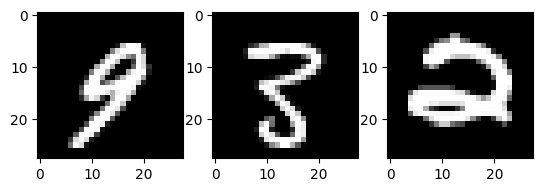

In [17]:
# 5. plot three images and print their labels
idx = np.random.choice(range(64),3) # three rundom indices
plt.subplot(1,3,1)
plt.imshow(batch_images[idx[0]].numpy().squeeze(), cmap='Greys_r')
plt.subplot(1,3,2)
plt.imshow(batch_images[idx[1]].numpy().squeeze(), cmap='Greys_r')
plt.subplot(1,3,3)
plt.imshow(batch_images[idx[2]].numpy().squeeze(), cmap='Greys_r')
print("Labels:",batch_labels[idx])

### **3. Neural Network - Architecture**

In the next section, we are going to implement a neural network with pytorch that gets mnist images and recognize the digit in them.  

Network Architecture (see image below): **784 input units**, a hidden layer with **128 units** and a **ReLU activation**, then a hidden layer with **64 units** and a **ReLU activation**, and finally an **output layer** with a **log-softmax activation**.

Note: Since simple neural networks get vectors as inputs, and not images (unlike CNNs), we should flatten the data. Each sample with shape (28,28) becomes (784,). That is why the input layer has 784 units.  


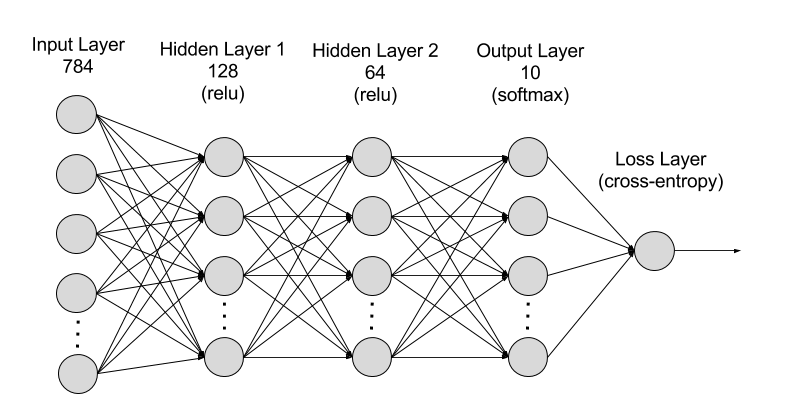

Complete the code below: The constructor (```__init___```) should contain defenitions of layers like ```Linear``` or ```Relu```. The ```forward``` function should contain the logic between the layers declared in the constructor.  

For this section, as well as the next section, you can follow online tutorials (like **[this tutorial](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html)** or **[this one](https://www.marktechpost.com/2019/11/09/create-a-neural-network-with-pytorch/)**) to understand how to implement neural networks with pytorch.

In [18]:
from torch import nn, optim
import torch.nn.functional as F

In [19]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        '''
        Declare layers for the model
        '''
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512), #input is 784, output is 512
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 10),  # Input: 256, Output: 10
            nn.ReLU()
        )

    def forward(self, x):
        ''' Forward pass through the network, returns log_softmax values '''
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return F.log_softmax(logits, dim=1)


model = NeuralNetwork()
model

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=10, bias=True)
    (7): ReLU()
  )
)

Now that we have a network, let's see what happens when we pass in an image.  
Let's choose a random image and pass it through the network. It should return a prediction - confidences for each class. The class with the highest confidence is the prediction of the model for that image.   
We visualize the results using ```view_classify``` function below.

In [20]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    image - the input image to the network
    ps - the class confidences (network output)
    '''
    ps = ps.data.numpy().squeeze()
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

In [21]:
def random_prediction_example(data_loader, model):
  '''
  The function sample an image from the data, pass it through the model (inference)
  and show the prediction visually. It returns the predictions confidences.
  '''
  # take a batch and randomly pick an image
  dataiter = iter(data_loader)
  images, labels = next(dataiter)
  images.resize_(64, 1, 784)
  img = images[0] #select the first image
  label = labels[0] #true label for reference

# Forward pass through the network
  # we use torch.no_grad() for faster inference and to avoid gradients from
  # moving through the network.
  with torch.no_grad():
    ps = model(img.view(-1, 784))  # Forward pass
    ps = torch.exp(ps)  # Convert log-probabilities to probabilities
    predicted_class = torch.argmax(ps).item()

  # visualize image and prediction
  view_classify(img.view(1, 28, 28), ps)
  return ps, predicted_class, label

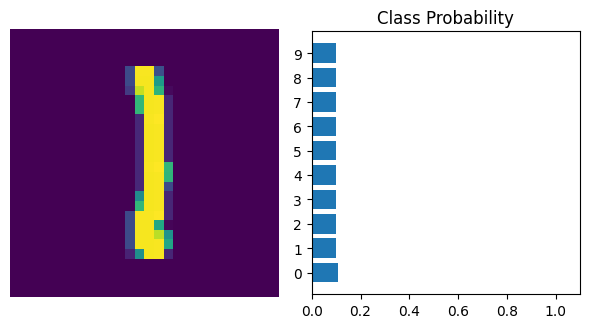

In [22]:
# you can run this cell multiple times for different images
preds_conf, predicted_class, true_label = random_prediction_example(mnist_dataloader, model)


Print the prediction of the network for that sample:

In [23]:
# Print the prediction

print(f"True Label: {true_label.item()}, Predicted Class: {predicted_class}")


True Label: 1, Predicted Class: 0


### **4. Neural Network - Training**

We can now train and evaluate our network.
1. Split the dataset into a training set and a validation set. Train-set size: 80% of the total data. Val-set size: the rest (20%).
2. Create a dataloader for each set (```train_loader``` and ```val_loader```, see Section 2 for examples).
3. Choose hyperparameters (for now we choose ```learning_rate=0.003``` and ```num_epochs=5```).
4. Use SGD (Stochastic Gradient Descent) as the optimizer.
5. Since it is a multi-class classification task, use "negative log-likelihood loss" as the loss criterion.
6. Train your model on the train-set and evaluate it on the validation-set.
7. During training, for each epoch, track the training loss and validation loss.

In [24]:
from torch.utils import data

In [25]:
torch.manual_seed(42)  # Set a random seed for reproducibility
# 1. split trainset into train and validation (use torch.utils.data.random_split())
train_data, val_data = data.random_split(mnist_data, [int(0.8*len(mnist_data)), len(mnist_data) - int(0.8*len(mnist_data))])

# 2.1. create data loader for the trainset (batch_size=64, shuffle=True)

train_loader = data.DataLoader(train_data, batch_size=64, shuffle=True)

# 2.2. create data loader for the valset (batch_size=64, shuffle=False)

val_loader = data.DataLoader(val_data, batch_size = 64, shuffle = False)

In [26]:
# 3. set hyper parameters
learning_rate = 0.003
nepochs = 5
momentum = 0.9

In [27]:
model = NeuralNetwork()

# 4. create sgd optimizer. It should optimize our model parameters with
#    learning_rate defined above

optimizer = optim.SGD(model.parameters(), learning_rate, momentum )

# 5. create a criterion object. It should be negative log-likelihood loss since the task
#    is a multi-task classification (digits classification)

criterion = nn.NLLLoss()

In [28]:
def train_model(model, optimizer, criterion,
                nepochs, train_loader, val_loader, is_image_input=False):
    '''
    Train a pytorch model and evaluate it every epoch.
    Params:
    model - a pytorch model to train
    optimizer - an optimizer
    criterion - the criterion (loss function)
    nepochs - number of training epochs
    train_loader - dataloader for the trainset
    val_loader - dataloader for the valset
    is_image_input (default False) - If True, flatten 2D images into a 1D array.
                                     Should be True for Neural Networks
                                     but False for Convolutional Neural Networks.
    '''
    train_losses, val_losses = [], []
    for e in range(nepochs):
        running_loss = 0.0
        running_val_loss = 0.0

        # Training loop
        model.train()  # Set model to training mode
        for images, labels in train_loader:
            if is_image_input:
                # Flatten images for Neural Networks
                images = images.view(images.size(0), -1)

            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)  # Compute loss

            # Backward pass
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Validation loop
        model.eval()  # Set model to evaluation mode
        with torch.no_grad():
            for images, labels in val_loader:
                if is_image_input:
                    # Flatten images for Neural Networks
                    images = images.view(images.size(0), -1)

                # Forward pass
                outputs = model(images)
                val_loss = criterion(outputs, labels)
                running_val_loss += val_loss.item()

        # Track losses
        train_loss = running_loss / len(train_loader)
        val_loss = running_val_loss / len(val_loader)
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        # Print progress
        print(f"Epoch: {e+1}/{nepochs}.. "
              f"Training Loss: {train_loss:.3f}.. "
              f"Validation Loss: {val_loss:.3f}")

    return train_losses, val_losses


In [29]:
  # 6.1. Train the model.
  ## NOTE: Do not run this cell continuously without running the two cells above!
  ##       Otherwise, you might train a model you have already trained.
  ##       So make sure to run the two cells above (to first initialize the model
  ##       and optimizer), every time, before running this cell!
train_losses, val_losses = train_model(model, optimizer, criterion, nepochs,
                                       train_loader, val_loader, is_image_input=True)

Epoch: 1/5.. Training Loss: 1.252.. Validation Loss: 0.818
Epoch: 2/5.. Training Loss: 0.733.. Validation Loss: 0.708
Epoch: 3/5.. Training Loss: 0.658.. Validation Loss: 0.648
Epoch: 4/5.. Training Loss: 0.616.. Validation Loss: 0.618
Epoch: 5/5.. Training Loss: 0.589.. Validation Loss: 0.605


If you implemented everything correctly, you should see the training loss drop with each epoch.

8. Plot train loss and validation loss as a function of epoch. **On the same graph!**

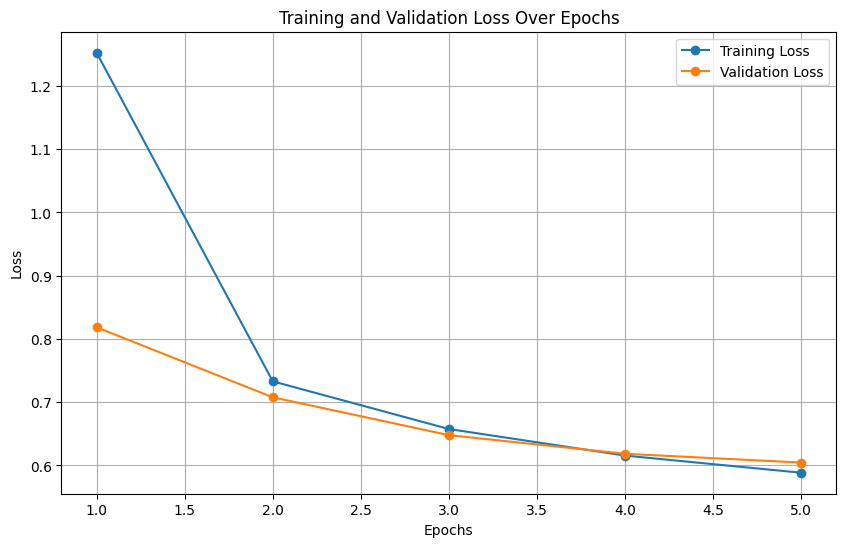

In [30]:
# plot train and validation loss as a function of #epochs
import matplotlib.pyplot as plt

def plot_losses(train_losses, val_losses):
    '''
    Plots training and validation loss over epochs.
    '''
    epochs = range(1, len(train_losses) + 1)  # Create a range for the number of epochs

    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_losses, label='Training Loss', marker='o')  # Training loss
    plt.plot(epochs, val_losses, label='Validation Loss', marker='o')  # Validation loss

    plt.title('Training and Validation Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function with the tracked losses
plot_losses(train_losses, val_losses)


With the network trained, we can check out it's predictions:

(tensor([[2.5528e-05, 2.5528e-05, 2.5528e-05, 2.5528e-05, 7.9473e-04, 2.6704e-05,
          2.5528e-05, 6.1218e-05, 2.5528e-05, 9.9896e-01]]),
 9,
 tensor(9))

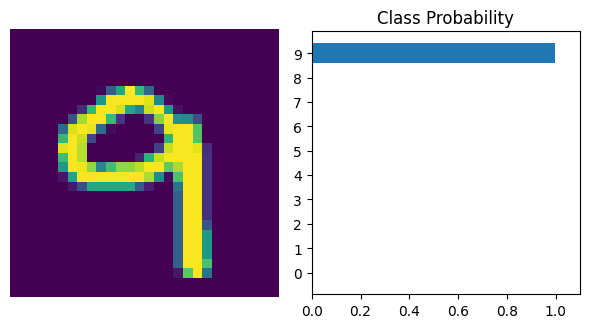

In [31]:
# you can run this cell multiple times for different images
random_prediction_example(mnist_dataloader, model)

Calculate the model's accuracy on the validation-set.

In [41]:
def evaluate_model(model, val_loader, is_image_input=False):
    '''
    Evaluate a model on the given dataloader.
    Params:
    model - a pytorch model to evaluate
    val_loader - dataloader for the validation set
    is_image_input (default False) - If True, flatten 2D images into a 1D array
                                     (for Neural Networks).
                                     Should be False for Convolutional Neural Networks.
    '''
    validation_accuracy = 0
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient calculations
        for images, labels in val_loader:
            if is_image_input:
                # Flatten images for Neural Networks
                images = images.view(images.size(0), -1)

            # Forward pass
            log_ps = model(images)  # Get the log probabilities
            ps = torch.exp(log_ps)  # Convert to probabilities
            top_p, top_class = ps.topk(1, dim=1)  # Get the predicted class

            # Compare predictions to true labels
            equals = top_class == labels.view(*top_class.shape)
            validation_accuracy += torch.sum(equals.type(torch.FloatTensor))

    # Normalize accuracy by dataset size
    accuracy = validation_accuracy / len(val_loader.dataset)
    return accuracy


In [42]:
print(f"Validation accuracy: {evaluate_model(model, val_loader, is_image_input=True)}")

Validation accuracy: 0.8401666879653931


### **5. Convolutional Neural Networks**

In this section, we are going to implement a convolutional neural network (CNN) and train it on the mnist dataset. It will be very similar to what you did in the previous sections but now we use new layers like ```convolution```and ```pooling```.  

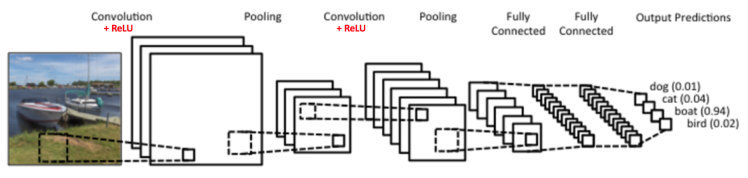

Reminder:  
You can go over this **[article](https://cs231n.github.io/convolutional-networks/)** to better understand convolutional neural networks.

- **Convolutional operation:** A “filter”, also called a “kernel”, is passed over the image, viewing a few pixels at a time (for example, 3X3 or 5X5). The convolution operation is a dot product of the original pixel values with weights defined in the filter. The results are summed up into one number that represents all the pixels the filter observed.

- **Pooling:** “Pooling” is the process of further downsampling and reducing the size of the matrix. A filter is passed over the results of the previous layer and selects one number out of each group of values (typically the maximum, this is called max pooling). This allows the network to train much faster, focusing on the most important information in each feature of the image. By sliding the window along the image, we compute the mean or the max of the portion of the image inside the window in case of MeanPooling or MaxPooling.

- **Stride:** The number of pixels to pass at a time when sliding the convolutional kernel.

- **Padding:** To preserve exactly the size of the input image, it is useful to add zero padding on the border of the image.

**Q1:** Given an image with shape [1,32,32], what will be the shape of the output of a convolution layer with 5 5x5 kernels (filters) without padding?

**A1:**
<font color='red'>output shape = [5, 28, 28]

using the formula:

output_size = (input_size + 2*padding - kernel_size)/Stride   + 1

without padding implies that padding = 0

since no stride number is specified, the default for stride = 1

kernel 5x5; input size 32x32

output_size = (32 + 2(0) - 5)/1 + 1

output_size = 28 x 28

since 5 filters were applied, the channel for the output layer is 5,

hence the shape

output shape = [5, 28, 28]


</font>

**Q2:** We would like our convolution layer to output a volume with the same shape as the input image. So input_shape and output_shape will be [1,32,32]. What should be the padding?

**A2:**
<font color='red'>
padding = 2

using the formula:

output_size = (input_size + 2*padding - kernel_size)/Stride + 1

since output_size = input_size = 32, stride = 1, kernel = 5x5

32 = 32 -5 + 2p + 1

p = 2
</font>

**Q3:** Given an image with width $W_{in}$, height $H_{in}$, and a convolution layer with padding $P$, stride $S$ and filter size $F$. Write a formula for the width $W_{out}$ and a formula for the height $H_{out}$ of the convolution's output.   
(In other words, what will be the width and the height of the output?).

**A3:**
<font color='red'>
𝑊𝑜𝑢𝑡 = (𝑊𝑖𝑛 + 2P - F)/S + 1

𝐻𝑜𝑢𝑡 = (𝐻𝑖𝑛 + 2P - F)/S +1
</font>

Let's create a simple Convolutional neural network.
The architecture:  
**Conv layer** (10 5x5 Kernels) -> **Max Pooling** (2x2 kernel) -> **Relu** -> **Conv layer** (20 5x5 Kernels) -> **Max Pooling** (2x2 kernel) -> **Relu** -> **Hidden layer** (320 units) -> **Relu** -> **Hidden layer** (50 units) -> **Output layer** (10 outputs).

In [43]:
class ConvolutionalNet(nn.Module):
    def __init__(self):
        super(ConvolutionalNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

        # Initialize weights
        nn.init.kaiming_normal_(self.conv1.weight)
        nn.init.kaiming_normal_(self.conv2.weight)
        nn.init.xavier_normal_(self.fc1.weight)
        nn.init.xavier_normal_(self.fc2.weight)

    def forward(self, x):
        x = self.conv1(x)
        x = F.max_pool2d(x, 2)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.max_pool2d(x, 2)
        x = F.relu(x)
        x = x.view(-1, 320)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)


cnn_model = ConvolutionalNet()
print(cnn_model)

ConvolutionalNet(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


We can now train the model on the train set.

In [44]:
# set hyperparameters
cnn_nepochs = 5
cnn_learning_rate = 0.001

In [45]:
# train the conv model
cnn_model = ConvolutionalNet()
# create sgd optimizer
cnn_optimizer = optim.SGD(cnn_model.parameters(), lr=cnn_learning_rate)
# create negative log likelihood loos
cnn_criterion = nn.NLLLoss()

train_losses, val_losses = train_model(cnn_model, cnn_optimizer, cnn_criterion,
                                       cnn_nepochs, train_loader, val_loader, is_image_input=False)

Epoch: 1/5.. Training Loss: 1.181.. Validation Loss: 0.630
Epoch: 2/5.. Training Loss: 0.508.. Validation Loss: 0.447
Epoch: 3/5.. Training Loss: 0.392.. Validation Loss: 0.379
Epoch: 4/5.. Training Loss: 0.335.. Validation Loss: 0.326
Epoch: 5/5.. Training Loss: 0.296.. Validation Loss: 0.292


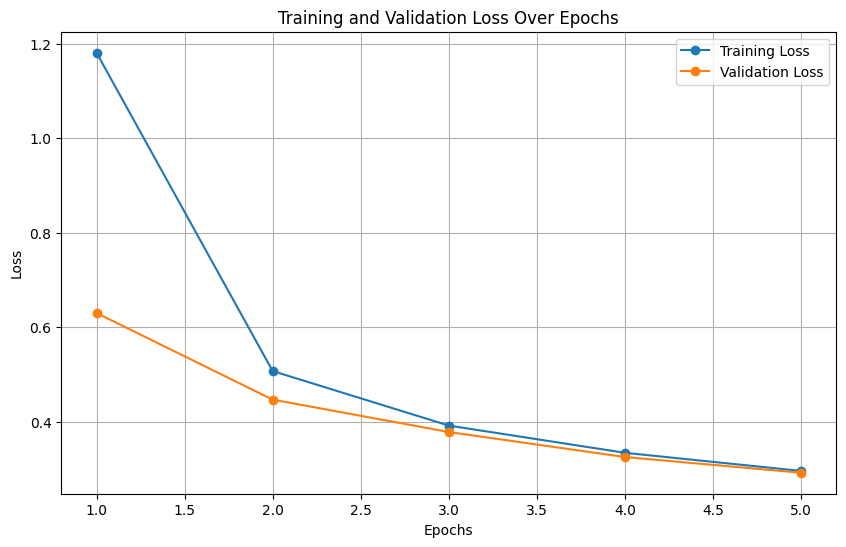

In [46]:
# Call the function with the tracked losses
plot_losses(train_losses, val_losses)

In [47]:
# evaluate on the validation set
print(f"Validation accuracy: {evaluate_model(cnn_model, val_loader, is_image_input=False)}")

Validation accuracy: 0.9126666784286499


You should probably see that our CNN performs better on the validation set compared to the simple neural network (within a few epochs only)

___________

Now it's your turn: Use the code above and create a convolutional neural network that achieves the best accuracy on the validation set.

You should consider changing:
1. Prepocess:
  - Change normalization
  - Better representation of the data

1. Network architecture:
  - Number of convolutional layers
  - Number of kernels (filters) for each convolutional layer
  - Size of each kernel on each layer
  - Number of hidden layers (fully connected)
  - Number of units for each hidden layer
  - Usage of layers like BatchNormalization and Dropout.
  - Usage of max pooling (or maybe other pooling strategies)

1. Training hyperparameters:
  - Learning rate
  - Optimizer (SGD with momentum, adam, etc)
  - Number of epochs



In [48]:
## Prepocess
# Define a transform to normalize the data
# Define a new transform with data augmentation and alternative normalization
new_transform = transforms.Compose([
    transforms.RandomRotation(10),  # Randomly rotate the images by up to 10 degrees
    transforms.RandomHorizontalFlip(),  # Randomly flip the images horizontally
    transforms.RandomCrop(28, padding=4),  # Randomly crop to 28x28 with padding
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize((0.1307,), (0.3081,))  # Dataset-specific mean and std for MNIST
])


In [49]:
# Apply new preprocessing to the training data
train_dataset_new = datasets.MNIST(root=data_path, train=True, download=True, transform=new_transform)

# Validation data should remain consistent with no augmentation
val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # Keep normalization consistent
])
val_dataset_new = datasets.MNIST(root=data_path, train=False, download=True, transform=val_transform)

# Create new data loaders
train_loader_new = torch.utils.data.DataLoader(train_dataset_new, batch_size=64, shuffle=True)
val_loader_new = torch.utils.data.DataLoader(val_dataset_new, batch_size=64, shuffle=False)


In [50]:
def train_model_cnn(model, optimizer, criterion,
                    nepochs, train_loader, val_loader):
    """
    Train a convolutional neural network and evaluate it on validation data.

    Params:
    model - the CNN model to train.
    optimizer - optimizer for updating model weights.
    criterion - loss function (e.g., NLLLoss).
    nepochs - number of training epochs.
    train_loader - dataloader for the training set.
    val_loader - dataloader for the validation set.
    """
    train_losses, val_losses, val_accuracies = [], [], []

    for e in range(nepochs):
        running_loss = 0
        running_val_loss = 0
        correct = 0
        total = 0

        # Training Phase
        model.train()  # Set the model to training mode
        for images, labels in train_loader:

            # Move data to GPU if available
            images, labels = images.to(device), labels.to(device)

            # Clear previous gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimizer step
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Validation Phase
        model.eval()  # Set the model to evaluation mode
        with torch.no_grad():  # Disable gradient calculations for validation
            for images, labels in val_loader:
                # Move data to GPU if available
                images, labels = images.to(device), labels.to(device)

                # Forward pass
                outputs = model(images)
                val_loss = criterion(outputs, labels)
                running_val_loss += val_loss.item()

                # Calculate validation accuracy
                _, predicted = torch.max(outputs, 1)  # Get predictions
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        # Compute average loss and accuracy
        train_loss_avg = running_loss / len(train_loader)
        val_loss_avg = running_val_loss / len(val_loader)
        val_accuracy = 100 * correct / total

        train_losses.append(train_loss_avg)
        val_losses.append(val_loss_avg)
        val_accuracies.append(val_accuracy)

        # Print epoch statistics
        print(f"Epoch: {e+1}/{nepochs}.. ",
              f"Training Loss: {train_loss_avg:.3f}.. ",
              f"Validation Loss: {val_loss_avg:.3f}.. ",
              f"Validation Accuracy: {val_accuracy:.2f}%")

    return train_losses, val_losses, val_accuracies

In [51]:
## Find network and hyperparams that achieve best validation accuracy as possible

class ImprovedCNN(nn.Module):
    def __init__(self):
        super(ImprovedCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)  # Conv Layer 1
        self.bn1 = nn.BatchNorm2d(32)  # Batch Normalization
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # Conv Layer 2
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)  # Conv Layer 3
        self.bn3 = nn.BatchNorm2d(128)
        self.fc1 = nn.Linear(128 * 3 * 3, 256)  # Fully Connected 1
        self.fc2 = nn.Linear(256, 128)  # Fully Connected 2
        self.fc3 = nn.Linear(128, 10)  # Output Layer
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.max_pool2d(x, 2)
        x = x.view(-1, 128 * 3 * 3)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)


In [52]:
## Training your hyperparameter

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate the model and move it to GPU if available
cnn_model_new = ImprovedCNN()
cnn_model_new = cnn_model_new.to(device)

# Define optimizer and loss function
optimizer = optim.Adam(cnn_model_new.parameters(), lr=0.001)
criterion = nn.NLLLoss()

# Train the model
train_losses, val_losses, val_accuracies = train_model_cnn(
    model=cnn_model_new,
    optimizer=optimizer,
    criterion=criterion,
    nepochs=20,
    train_loader=train_loader_new,
    val_loader=val_loader_new
)



Epoch: 1/20..  Training Loss: 0.746..  Validation Loss: 0.157..  Validation Accuracy: 94.99%
Epoch: 2/20..  Training Loss: 0.322..  Validation Loss: 0.114..  Validation Accuracy: 96.36%
Epoch: 3/20..  Training Loss: 0.252..  Validation Loss: 0.084..  Validation Accuracy: 97.47%
Epoch: 4/20..  Training Loss: 0.202..  Validation Loss: 0.071..  Validation Accuracy: 97.79%
Epoch: 5/20..  Training Loss: 0.179..  Validation Loss: 0.074..  Validation Accuracy: 97.75%
Epoch: 6/20..  Training Loss: 0.169..  Validation Loss: 0.073..  Validation Accuracy: 97.75%
Epoch: 7/20..  Training Loss: 0.156..  Validation Loss: 0.051..  Validation Accuracy: 98.21%
Epoch: 8/20..  Training Loss: 0.141..  Validation Loss: 0.058..  Validation Accuracy: 98.19%
Epoch: 9/20..  Training Loss: 0.132..  Validation Loss: 0.063..  Validation Accuracy: 98.20%
Epoch: 10/20..  Training Loss: 0.128..  Validation Loss: 0.045..  Validation Accuracy: 98.66%
Epoch: 11/20..  Training Loss: 0.120..  Validation Loss: 0.049..  Val

In [53]:
def evaluate_model_cnn(model, criterion, val_loader):
    """
    Evaluate a convolutional neural network on validation data.

    Params:
    model - the CNN model to evaluate.
    criterion - loss function (e.g., NLLLoss).
    val_loader - dataloader for the validation set.
    """
    running_val_loss = 0
    correct = 0
    total = 0

    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient calculations for validation
        for images, labels in val_loader:
            # Move data to GPU if available
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            val_loss = criterion(outputs, labels)
            running_val_loss += val_loss.item()

            # Calculate validation accuracy
            _, predicted = torch.max(outputs, 1)  # Get predictions
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Compute average loss and accuracy
    val_loss_avg = running_val_loss / len(val_loader)
    val_accuracy = 100 * correct / total

    print(f"Overall Validation Loss: {val_loss_avg:.3f}")
    print(f"Overall Validation Accuracy: {val_accuracy:.2f}%")
    return val_loss_avg, val_accuracy


In [54]:
# Get the overall validation accuracy
overall_val_loss, overall_val_accuracy = evaluate_model_cnn(
    model=cnn_model_new,
    criterion=criterion,
    val_loader=val_loader_new
)

print(f"Final Validation Accuracy: {overall_val_accuracy:.2f}%")

Overall Validation Loss: 0.047
Overall Validation Accuracy: 98.56%
Final Validation Accuracy: 98.56%


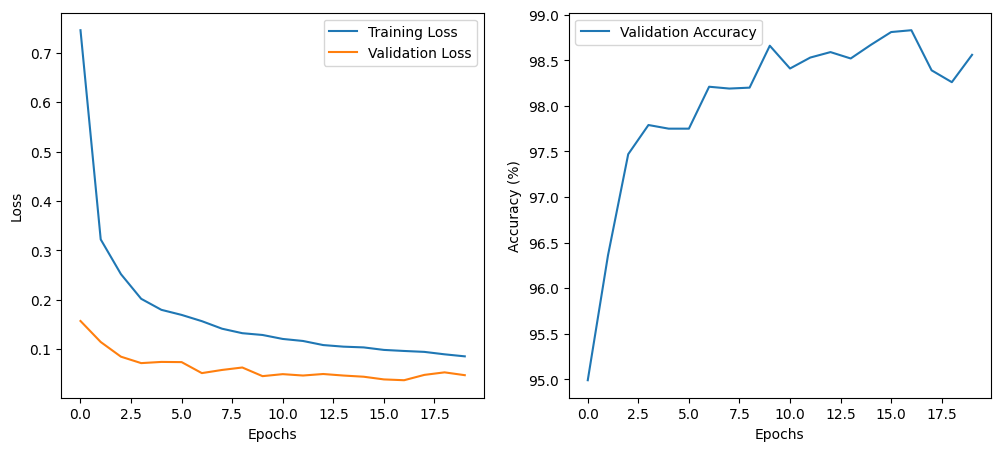

In [55]:
# Plot Losses and Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()

plt.show()

In [56]:
#   Function to save the best model in this variable
def save_model(model, filepath="trained_model.pth"):
    """
    Save the trained model to a file.

    Params:
    model - the trained PyTorch model.
    filepath - the file path to save the model.
    """
    torch.save(model.state_dict(), filepath)
    print(f"Model saved to {filepath}")


In [59]:
#Call the function to save the model

save_model(cnn_model_new, filepath="/content/Assignment5/cnn_trained_model.pth")

Model saved to /content/Assignment5/cnn_trained_model.pth


When you are satisfied with your model performance on the validation set, load the [test set](https://drive.google.com/file/d/1GFtLV1aNo49IDdObyyvZoTS4w_qEZvjM/view?usp=share_link) (the samples are already normalized), and write the model predictions for each test sample to a file called "predictions.txt". You can use the code below.


**Upload the file to the Moodle system with this notebook.**

Make sure that each prediction will be printed in a new line.

For Example ("predictions.txt"):
```
0  
5  
9
```

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
import os

# Navigate to a specific folder
folder_path = '/content/drive/My Drive/Machine_learning_Intro_Assignment'
os.chdir(folder_path)

# Verify current working directory
print("Current Directory:", os.getcwd())


Current Directory: /content/drive/My Drive/Machine_learning_Intro_Assignment


In [66]:
def predict_and_save(model, test_path, file_name):
    # Load mnist test data
    mnist_test_data = torch.utils.data.TensorDataset(torch.load(test_path))
    # Create a dataloader
    mnist_test_loader = torch.utils.data.DataLoader(mnist_test_data, batch_size=32, shuffle=False)

    # Get the device of the model
    device = next(model.parameters()).device

    # Make predictions for each batch and save all predictions in total_preds
    total_preds = torch.empty(0, dtype=torch.long, device=device)
    for imgs in mnist_test_loader:
        # Move input data to the same device as the model
        inputs = imgs[0].to(device)

        log_ps = model(inputs)
        ps = torch.exp(log_ps)
        _, top_class = ps.topk(1, dim=1)
        total_preds = torch.cat((total_preds, top_class.reshape(-1)))

    total_preds = total_preds.cpu().numpy()  # Move predictions to CPU for saving

    # Write all predictions to a file
    with open(file_name, "w") as pred_f:
        for pred in total_preds:
            pred_f.write(str(pred) + "\n")



In [67]:
# Ensure the model is on the GPU (or CPU if GPU is unavailable)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
best_model = ImprovedCNN()  # Define your model architecture
best_model.load_state_dict(torch.load("/content/Assignment5/cnn_trained_model.pth"))  # Load the trained weights
best_model.to(device)  # Move model to the correct device
best_model.eval()  # Set model to evaluation mode


<ipython-input-67-c460a6fb340c>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load("/content/Assignment5/cnn_trained_model.pth"))  # Load

ImprovedCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=1152, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [71]:
# run this to save test predictions to "predictions.txt"
predict_and_save(model = best_model, test_path="/content/Assignment5/mnist_test.pth", file_name="/content/Assignment5/predictions.txt")

<ipython-input-66-f032dc13a452>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  mnist_test_data = torch.utils.data.TensorDataset(torch.load(test_path))


In [70]:
import os

# Verify if the test data file exists
test_path = "/content/Assignment5/mnist_test.pth"
print("Test data exists:", os.path.exists(test_path))


Test data exists: True
